NAME: RANA NAMEER HUSSAIN KHAN

CLASS: BESE 10-B

CMS ID: 286271

ML LAB 3

# 📈 Linear Regression with Python

# 💾 Data

> We are going to use the `USA_Housing` dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city hou  se is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house


In [1]:
!pip install -q hvplot

     |████████████████████████████████| 3.1 MB 5.2 MB/s 


# 📤 Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

# sns.set_style("whitegrid")
# plt.style.use("fivethirtyeight")

## 💾 Check out the Data

In [3]:
USAhousing = pd.read_csv('USA_Housing.csv')
#RODO check whether data is loading correctly or not

In [4]:
USAhousing.isnull()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0                False                False                      False   
1                False                False                      False   
2                False                False                      False   
3                False                False                      False   
4                False                False                      False   
...                ...                  ...                        ...   
4995             False                False                      False   
4996             False                False                      False   
4997             False                False                      False   
4998             False                False                      False   
4999             False                False                      False   

      Avg. Area Number of Bedrooms  Area Population  Price  Address  
0                            False            False  False    False  
1                            False            False  False    False  
2                            False            False  False    False  
3                            False            False  False    False  
4                            False            False  False    False  
...                            ...              ...    ...      ...  
4995                         False            False  False    False  
4996                         False            False  False    False  
4997                         False            False  False    False  
4998                         False            False  False    False  
4999                         False            False  False    False  

[5000 rows x 7 columns]

In [5]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# 📊 Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!

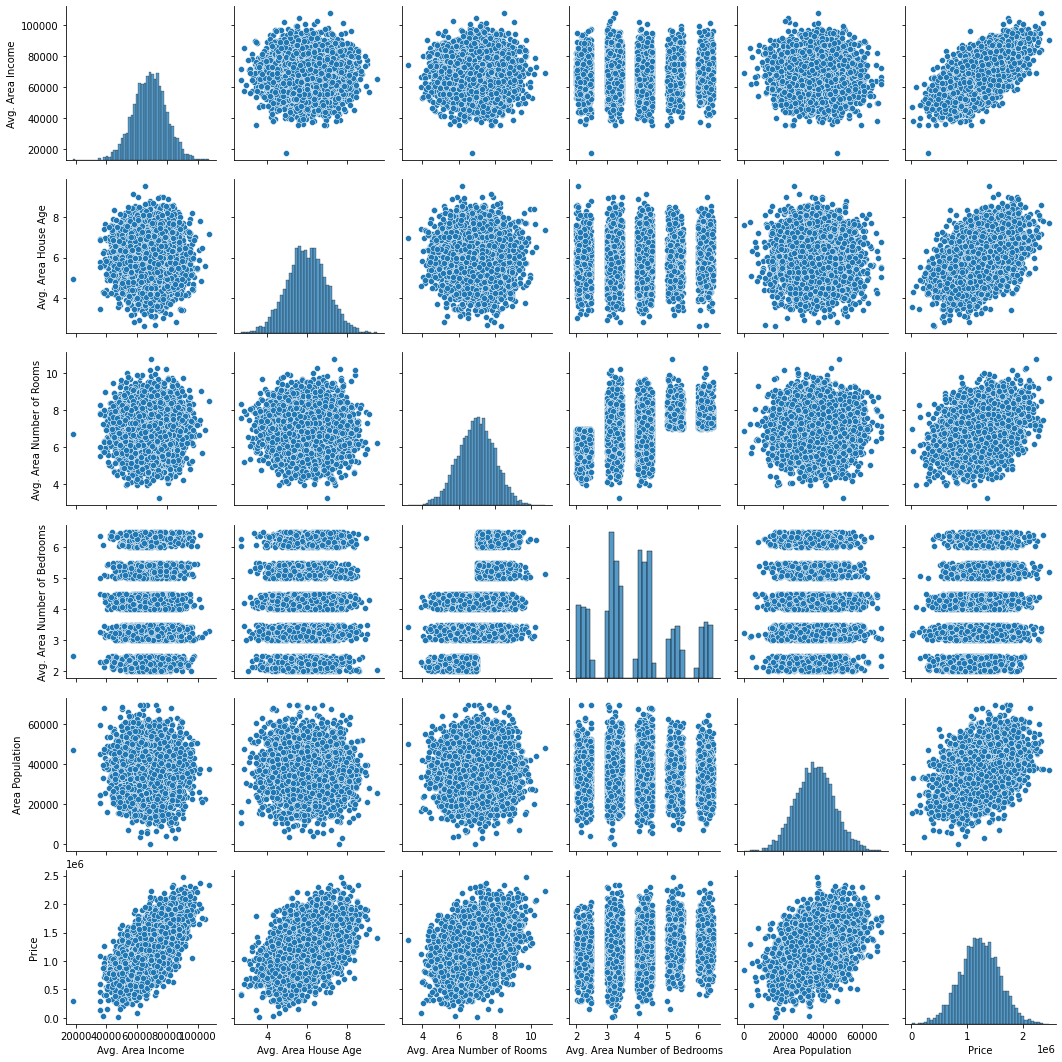

In [6]:
#print pair plot 
sns.pairplot(USAhousing)

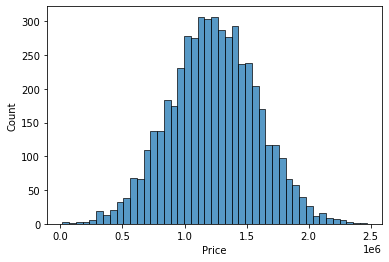

In [7]:
USAhousing.hvplot.hist(by='Price', subplots=False, width=1000)
sns.histplot(USAhousing['Price'])

In [8]:
USAhousing.hvplot.hist("Price")

:Histogram   [Price]   (Price_count)

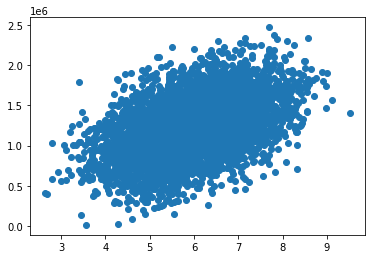

In [9]:
plt.scatter(USAhousing['Avg. Area House Age'],USAhousing['Price'])

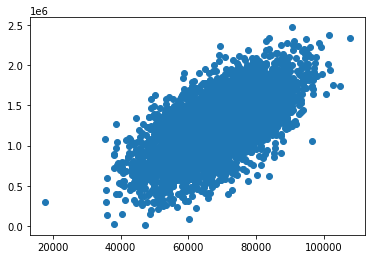

In [10]:
plt.scatter(USAhousing['Avg. Area Income'],USAhousing['Price'])

In [11]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

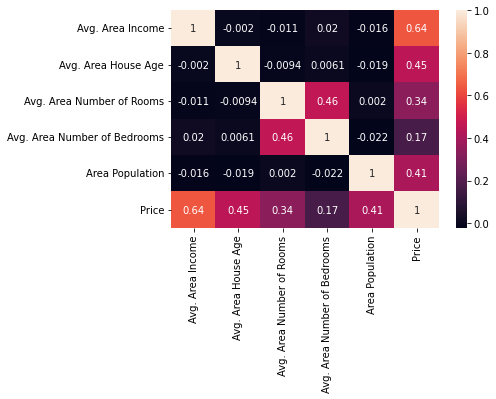

In [12]:
sns.heatmap(USAhousing.corr(), annot = True)

# 📈 Training a Linear Regression Model

> Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

## X and y arrays

In [13]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## 🧱 Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7,random_state=0)

In [15]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    return mae, mse, rmse, r2_square

# 📦 Preparing Data For Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.
- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

# ✔️ Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression

#TODO inplement linera regression and fit it on data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## ✔️ Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [18]:
# print the intercept
print(lr.intercept_)

1229303.2651802974


In [19]:
#print coeffecients 
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['coefficient : '])
coeff_df

coefficient : 
Avg. Area Income               230911.579316
Avg. Area House Age            164562.213014
Avg. Area Number of Rooms      120855.456012
Avg. Area Number of Bedrooms     2439.954280
Area Population                151835.662354

> Interpreting the coefficients:
>- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52**.
>- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28**.
>- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67**.
>- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80**.
>- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15**.

Does this make sense? Probably not because I made up this data.

## ✔️ Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [20]:
pred = lr.predict(X_test)

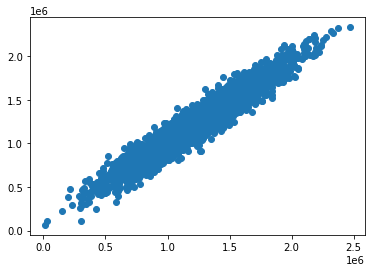

In [21]:
plt.scatter(y_test, pred)

**Residual Histogram**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


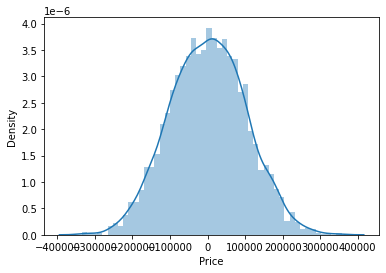

In [22]:
sns.distplot((y_test-pred),bins=50)

## ✔️ Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

> All of these are **loss functions**, because we want to minimize them.

In [23]:
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

Test set evaluation:
_____________________________________
MAE: 81440.29666435995
MSE: 10214201211.37916
RMSE: 101065.33140191625
R2 Square 0.9184400142719975
__________________________________
Train set evaluation:
_____________________________________
MAE: 81291.32480731452
MSE: 10244615801.15068
RMSE: 101215.68950093993
R2 Square 0.9169333484433614
__________________________________


Model           MAE           MSE           RMSE  R2 Square  \
0  Linear Regression  81440.296664  1.021420e+10  101065.331402    0.91844   

   Cross Validation  
0          0.917379

# ✔️ Stochastic Gradient Descent

> Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [24]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 81440.29494931633
MSE: 10214200824.917301
RMSE: 101065.32948997545
R2 Square 0.91844001735788
__________________________________
Train set evaluation:
_____________________________________
MAE: 81291.32267378642
MSE: 10244615801.163637
RMSE: 101215.68950100393
R2 Square 0.9169333484432564
__________________________________
